## Bibliotecas a utilizar

In [1]:
# Bibliotecas a utilizar 
import numpy                   as np      # Uso de álgebra lineal, funciones vectoriales
import pandas                  as pd      # Trabajar con DataFrames
import matplotlib.pyplot       as plt     # Para realizar gráficas
import seaborn                 as sns     # Otras funciones para graficar

from sklearn.neighbors             import KNeighborsClassifier # Modelo de K Vecinos Cercanos
from sklearn.metrics               import accuracy_score     # Función para calcular la precisión de clasificación
from sklearn.metrics               import confusion_matrix   # Función para calcular una matriz de confusión
from scipy.spatial.distance        import cdist              # Función para calcular la distancia euclidiana

sns.set()
import warnings
warnings.filterwarnings('ignore')
# print( LDA.__doc__ )

# Referencias::
# https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
# https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

##### Graficamos los puntos

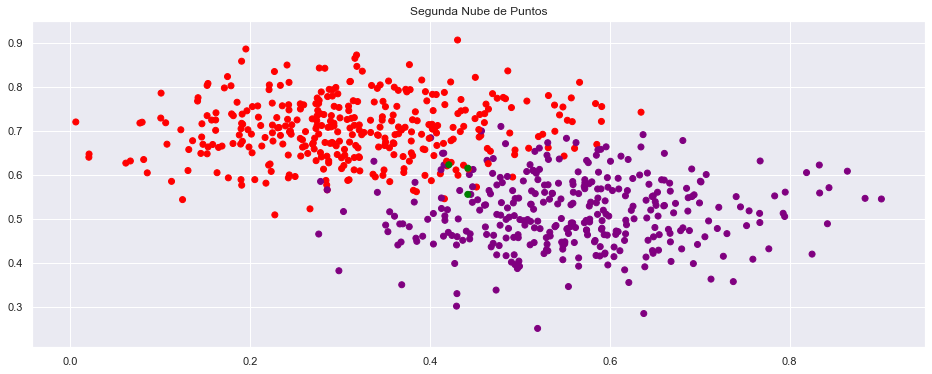

In [2]:
# Leemos datos de ejemplo
datos         = pd.read_csv("datos_knn.csv")   # Datos con 3 clases
colores       = ["red","purple","green"]
clase_numero  = np.array( [ 1 if x == "C1" else 2 if x == "C2" else 3 for x in datos["CLASE"] ] )
clase_colores = np.array( [ colores[x-1] for x in clase_numero ] )

# Graficamos nuestros puntos
fig, axs = plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
axs.set_title("Segunda Nube de Puntos")
axs.scatter( x=datos["X"], y=datos["Y"], c=clase_colores, label="Puntos")
plt.show()

### Clasificador KNN :: Método por Pesos Uniformes

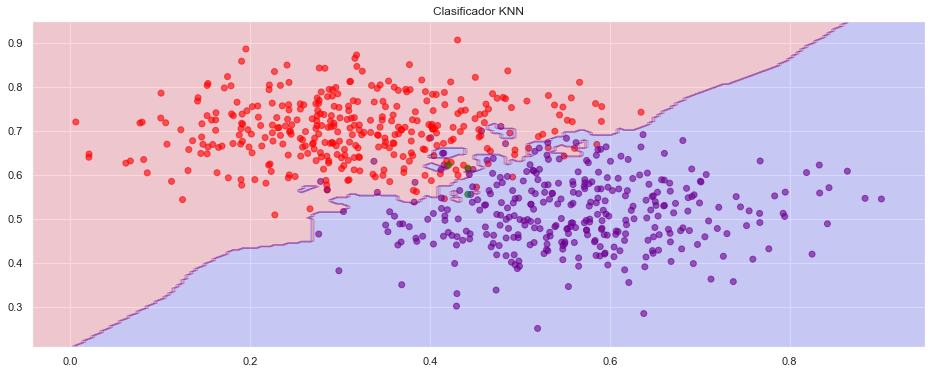

Precisión del modelo ::  96.19883040935673 %


In [3]:
# Leemos datos de ejemplo
matriz_diseño = datos.values[:,0:2]
y_reales      = datos.values[:,2]
y_reales_mod  = clase_numero
knn = KNeighborsClassifier(n_neighbors=3, weights="uniform").fit( matriz_diseño, y_reales_mod )

# Graficamos nuestros puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Clasificador KNN")
# Graficamos los puntos
plt.scatter( x=datos["X"], y=datos["Y"], c=clase_colores, label="Puntos", alpha = 0.6)
# Obtenemos los limites de la grafica actual para poder calcular Z
x_lim      = plt.gca().get_xlim()
y_lim      = plt.gca().get_ylim()
XX, YY     = np.meshgrid( np.linspace(x_lim[0], x_lim[1], 200  ), np.linspace(y_lim[0], y_lim[1], 200 ) )
XY         = np.vstack( [XX.ravel(), YY.ravel()] ).T
Z_fondo    = knn.predict( XY ).reshape( XX.shape ) 
# Graficamos el fondo para identificar la clase
plt.contourf(XX, YY, Z_fondo   , colors=["red","blue"], alpha=0.15)
plt.show()
print("Precisión del modelo :: ", knn.score( matriz_diseño, y_reales_mod )*100, "%" )

In [4]:
confusion_matrix( y_true = y_reales_mod, y_pred = knn.predict( matriz_diseño ) )

array([[339,  10,   0],
       [ 13, 319,   0],
       [  2,   1,   0]], dtype=int64)

### Clasificador KNN :: Método por Distancia

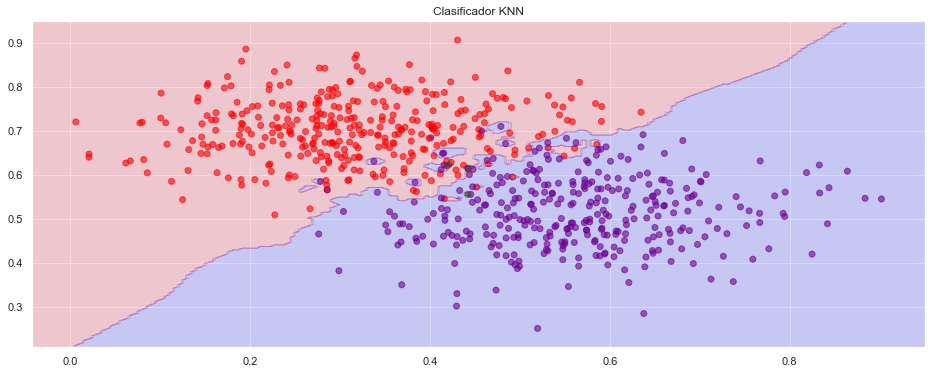

Precisión del modelo ::  100.0 %


In [5]:
# Leemos datos de ejemplo
matriz_diseño = datos.values[:,0:2]
y_reales      = datos.values[:,2]
y_reales_mod  = clase_numero
knn = KNeighborsClassifier(n_neighbors=3, weights="distance").fit( matriz_diseño, y_reales_mod )

# Graficamos nuestros puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Clasificador KNN")
# Graficamos los puntos
plt.scatter( x=datos["X"], y=datos["Y"], c=clase_colores, label="Puntos", alpha = 0.6)
# Obtenemos los limites de la grafica actual para poder calcular Z
x_lim      = plt.gca().get_xlim()
y_lim      = plt.gca().get_ylim()
XX, YY     = np.meshgrid( np.linspace(x_lim[0], x_lim[1], 200  ), np.linspace(y_lim[0], y_lim[1], 200 ) )
XY         = np.vstack( [XX.ravel(), YY.ravel()] ).T
Z_fondo    = knn.predict( XY ).reshape( XX.shape ) 
# Graficamos el fondo para identificar la clase
plt.contourf(XX, YY, Z_fondo   , colors=["red","blue"], alpha=0.15)
plt.show()
print("Precisión del modelo :: ", knn.score( matriz_diseño, y_reales_mod )*100, "%" )

In [6]:
confusion_matrix( y_true = y_reales_mod, y_pred = knn.predict( matriz_diseño ) )

array([[349,   0,   0],
       [  0, 332,   0],
       [  0,   0,   3]], dtype=int64)

### Clasificador KNN :: Método por MH / Rareza

Recordemos como funciona el método tradicional

In [7]:
# Funcion que al ingresar un vector de distancia, devuelve los indices de los k más pequeños
def KMasCercanos( k, arreglo, regresar_indices = True ):
    indices = np.argsort(arreglo)[1:(k+1)]
    if regresar_indices:
        return indices
    else:
        return arreglo[indices]
    
# Matriz de Distancias de Ejemmplo
PuntosX           = [ 1, 5, 6, 8, 9, 2 ]
PuntosY           = [ 3, 8, 2, 9, 4, 5 ]
coordenadas       = np.array( ( PuntosX, PuntosY ) ).T
matriz_distancias = cdist( coordenadas, coordenadas, metric='euclidean' )
print("Matriz de Distancias Euclidianas")
print( matriz_distancias )
print("")
print("Ejemplos de la Función")
print( KMasCercanos( k = 3, arreglo =  matriz_distancias[0,:], regresar_indices = False ) )
print( KMasCercanos( k = 3, arreglo =  matriz_distancias[0,:], regresar_indices = True ) )
print("")
print( KMasCercanos( k = 3, arreglo =  matriz_distancias[2,:], regresar_indices = False ) )
print( KMasCercanos( k = 3, arreglo =  matriz_distancias[2,:], regresar_indices = True ) )
print("")
print( KMasCercanos( k = 3, arreglo =  matriz_distancias[4,:], regresar_indices = False ) )
print( KMasCercanos( k = 3, arreglo =  matriz_distancias[4,:], regresar_indices = True ) )

Matriz de Distancias Euclidianas
[[0.         6.40312424 5.09901951 9.21954446 8.06225775 2.23606798]
 [6.40312424 0.         6.08276253 3.16227766 5.65685425 4.24264069]
 [5.09901951 6.08276253 0.         7.28010989 3.60555128 5.        ]
 [9.21954446 3.16227766 7.28010989 0.         5.09901951 7.21110255]
 [8.06225775 5.65685425 3.60555128 5.09901951 0.         7.07106781]
 [2.23606798 4.24264069 5.         7.21110255 7.07106781 0.        ]]

Ejemplos de la Función
[2.23606798 5.09901951 6.40312424]
[5 2 1]

[3.60555128 5.         5.09901951]
[4 5 0]

[3.60555128 5.09901951 5.65685425]
[2 3 1]


In [8]:
# Matriz de Distancias
PuntosX           = datos["X"]
PuntosY           = datos["Y"]
coordenadas       = np.array( ( PuntosX, PuntosY ) ).T
matriz_distancias = cdist( coordenadas, coordenadas, metric='euclidean' )

# Proceso de clasificacion
lista_clasificaciones = list()
for indice in np.arange(datos.shape[0]): #np.arange(100)
    indices_cercanos  = KMasCercanos( k = 3, arreglo =  matriz_distancias[indice,:], regresar_indices = True )
    k_clasificaciones = np.array( datos["CLASE"] )[ indices_cercanos ]
    clasificacion     = max( set(k_clasificaciones), key=list(k_clasificaciones).count)
    lista_clasificaciones.append( clasificacion )
lista_clasificaciones = np.array( lista_clasificaciones )
# Matriz de Confusion
print("Matriz de Confusión")
print( confusion_matrix(y_true = np.array( datos["CLASE"] ), y_pred = lista_clasificaciones ) )
# Precisión del modelo
print("")
print("Precisión del modelo :: " )
print( np.round( accuracy_score(y_true = np.array( datos["CLASE"] ), y_pred = lista_clasificaciones )*100, 2), "%"  )

Matriz de Confusión
[[330  18   1]
 [ 22 309   1]
 [  2   1   0]]

Precisión del modelo :: 
93.42 %


Ahora ponderemos por la **rareza** de cada clase

In [9]:
# Funcion que al ingresar un vector de distancia, devuelve los indices de los k más pequeños
def KMasCercanosMod( k, arreglo, regresar_indices = True ):
    indices = np.argsort(arreglo)[0:(k+0)]
    if regresar_indices:
        return indices
    else:
        return arreglo[indices]
    
# Matriz de Distancias de Ejemmplo
PuntosX           = [ 1, 5, 6, 8, 9, 2 ]
PuntosY           = [ 3, 8, 2, 9, 4, 5 ]
coordenadas       = np.array( ( PuntosX, PuntosY ) ).T
matriz_distancias = cdist( coordenadas, coordenadas, metric='euclidean' )
print("Matriz de Distancias Euclidianas")
print( matriz_distancias )
print("")
print("Ejemplos de la Función")
print( KMasCercanosMod( k = 3, arreglo =  matriz_distancias[0,:], regresar_indices = False ) )
print( KMasCercanosMod( k = 3, arreglo =  matriz_distancias[0,:], regresar_indices = True ) )
print("")
print( KMasCercanosMod( k = 3, arreglo =  matriz_distancias[2,:], regresar_indices = False ) )
print( KMasCercanosMod( k = 3, arreglo =  matriz_distancias[2,:], regresar_indices = True ) )
print("")
print( KMasCercanosMod( k = 3, arreglo =  matriz_distancias[4,:], regresar_indices = False ) )
print( KMasCercanosMod( k = 3, arreglo =  matriz_distancias[4,:], regresar_indices = True ) )

Matriz de Distancias Euclidianas
[[0.         6.40312424 5.09901951 9.21954446 8.06225775 2.23606798]
 [6.40312424 0.         6.08276253 3.16227766 5.65685425 4.24264069]
 [5.09901951 6.08276253 0.         7.28010989 3.60555128 5.        ]
 [9.21954446 3.16227766 7.28010989 0.         5.09901951 7.21110255]
 [8.06225775 5.65685425 3.60555128 5.09901951 0.         7.07106781]
 [2.23606798 4.24264069 5.         7.21110255 7.07106781 0.        ]]

Ejemplos de la Función
[0.         2.23606798 5.09901951]
[0 5 2]

[0.         3.60555128 5.        ]
[2 4 5]

[0.         3.60555128 5.09901951]
[4 2 3]


In [10]:
# Matriz de Distancias
PuntosX           = datos["X"]
PuntosY           = datos["Y"]
coordenadas       = np.array( ( PuntosX, PuntosY ) ).T
matriz_distancias = cdist( coordenadas, coordenadas, metric='euclidean' )
rareza            = np.array([ 1/349 if x=="C1" else 1/332 if x=="C2" else 1/3 for x in datos["CLASE"] ])

# Proceso de clasificacion
lista_clasificaciones = list()
for indice in np.arange(datos.shape[0]): #np.arange(100)
    indices_cercanos  = KMasCercanosMod( k = 3, arreglo =  matriz_distancias[indice,:], regresar_indices = True )
    k_clasificaciones = np.array( datos["CLASE"] )[ indices_cercanos ]
    k_pesos           = rareza[ indices_cercanos ]
    #clasificacion     = max( set(k_clasificaciones), key=list(k_clasificaciones).count)
    clasificacion     = pd.DataFrame( { "CLASE" : k_clasificaciones, "PESO" : k_pesos } ).groupby("CLASE").agg("sum").idxmax()[0]
    lista_clasificaciones.append( clasificacion )
lista_clasificaciones = np.array( lista_clasificaciones )

# Matriz de Confusion
print("Matriz de Confusión")
print( confusion_matrix(y_true = np.array( datos["CLASE"] ), y_pred = lista_clasificaciones ) )
# Precisión del modelo
print("")
print("Precisión del modelo :: " )
print( np.round( accuracy_score(y_true = np.array( datos["CLASE"] ), y_pred = lista_clasificaciones )*100, 2), "%"  )

Matriz de Confusión
[[334  10   5]
 [ 11 317   4]
 [  0   0   3]]

Precisión del modelo :: 
95.61 %


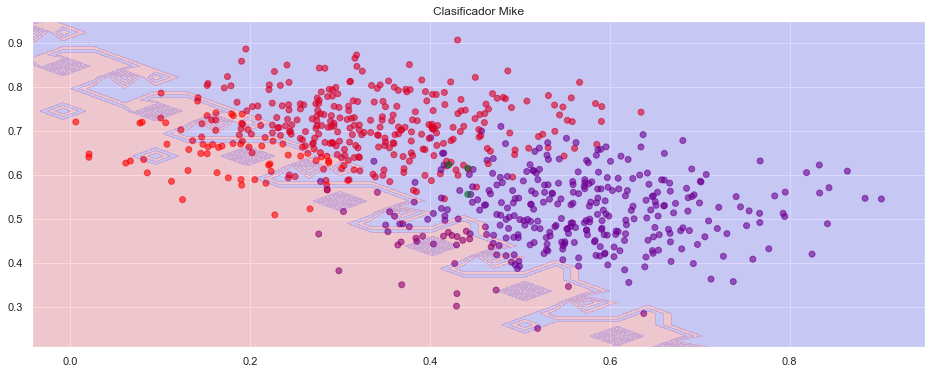

Precisión del modelo ::  100.0 %


In [11]:
# Leemos datos de ejemplo
matriz_diseño = datos.values[:,0:2]
y_reales      = datos.values[:,2]
y_reales_mod  = clase_numero

# Graficamos nuestros puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Clasificador Mike")
# Graficamos los puntos
plt.scatter( x=datos["X"], y=datos["Y"], c=clase_colores, label="Puntos", alpha = 0.6)
# Obtenemos los limites de la grafica actual para poder calcular Z
x_lim      = plt.gca().get_xlim()
y_lim      = plt.gca().get_ylim()
XX, YY     = np.meshgrid( np.linspace(x_lim[0], x_lim[1], 30  ), np.linspace(y_lim[0], y_lim[1], 30 ) )
XY         = np.vstack( [XX.ravel(), YY.ravel()] ).T
#Z_fondo    = knn.predict( XY ).reshape( XX.shape ) 
####################################################################
# Matriz de Distancias
PuntosX           = datos["X"]
PuntosY           = datos["Y"]
coordenadas       = np.array( ( PuntosX, PuntosY ) ).T
matriz_distancias = cdist( coordenadas, coordenadas, metric='euclidean' )
rareza            = np.array([ 1/349 if x=="C1" else 1/332 if x=="C2" else 1/3 for x in datos["CLASE"] ])

# Proceso de clasificacion
lista_clasificaciones = list()
for indice in np.arange(XY.shape[0]): #np.arange(100)
    NuevosPuntosX = list(PuntosX)
    NuevosPuntosX.append( XY[indice,0] )
    NuevosPuntosY = list(PuntosX)
    NuevosPuntosY.append( XY[indice,1] )
    NuevasCoordenadas     = np.array( ( NuevosPuntosX, NuevosPuntosY ) ).T
    NuevaMatrizDistancias = cdist( NuevasCoordenadas, NuevasCoordenadas, metric='euclidean' )

    indices_cercanos  = KMasCercanos( k = 5, arreglo =  NuevaMatrizDistancias[coordenadas.shape[0],:], regresar_indices = True )
    k_clasificaciones = np.array( datos["CLASE"] )[ indices_cercanos ]
    k_pesos           = rareza[ indices_cercanos ]
    #clasificacion     = max( set(k_clasificaciones), key=list(k_clasificaciones).count)
    clasificacion     = pd.DataFrame( { "CLASE" : k_clasificaciones, "PESO" : k_pesos } ).groupby("CLASE").agg("sum").idxmax()[0]
    lista_clasificaciones.append( clasificacion )

Z_fondo    = np.array([ 1 if x=="C1" else 2 if x=="C2" else 3 for x in np.array(lista_clasificaciones) ]).reshape( XX.shape ) 
####################################################################
# Graficamos el fondo para identificar la clase
plt.contourf(XX, YY, Z_fondo   , colors=["red","blue"], alpha=0.15)
plt.show()
print("Precisión del modelo :: ", knn.score( matriz_diseño, y_reales_mod )*100, "%" )